In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sqlite3

sys.path.insert(0, '/home/nsryan/Desktop/arfc/transition-scenarios/scripts')
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]
plt.rcParams.update({'font.size': 15})

In [2]:
import cymetric as cym
import transition_metrics as tm
import dataframe_analysis as dta

import waste_calcs

## Scope

This single XE-100-like simulation is to establish BOE calculations. One XE-100-like reactor is deployed in 1965 and operates for 60 years without shutting down. There is one mine, mill, conversion facility, enrichment facility, fuel fabrication facility, and repository.

In this notebook, I will test each of the analyses that I will perform on multi-reactor simulations to ensure they match back-of-the-envelope calculations.

## Reactor Deployment

In [54]:
current_outfile = 'output_files/two_xe100_5.sqlite'

In [55]:
current_xe = ['Mine', 'Sink_LLW', 'WetStorage',
               'Enrichment', 'DryStorage', 'United States',
               'Xe_100CoolingPool', 'FuelCycle', 'Xe_100_1', 'Xe_100_2']
# current_xe = [
#     'Mine', 'Sink_HLW', 'Sink_LLW', 'Enrichment', 'WetStorage', 'DryStorage', 'Xe-100CoolingPool', 'United States', 'FuelCycle'
# ]

In [56]:
current_reactors = tm.get_prototype_totals(current_outfile, current_xe, ['FuelCycle'])
current_reactors = dta.add_year(current_reactors)

In [57]:
current_reactors

Prototype,index,Time,0,DryStorage_enter,Enrichment_enter,FuelCycle_enter,Mine_enter,Sink_LLW_enter,United States_enter,WetStorage_enter,...,Xe_100CoolingPool_exit,FuelCycle_exit,Xe_100_1_exit,Xe_100_2_exit,lwr_exit,lwr_total,Year,advrx_enter,advrx_total,FuelCycle_total
0,0,0,0.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1965.00,1.0,1.0,1.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1965.08,0.0,1.0,1.0
2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1965.17,0.0,1.0,1.0
3,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1965.25,0.0,1.0,1.0
4,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1965.33,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2089.58,0.0,1.0,1.0
1496,1496,1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2089.67,0.0,1.0,1.0
1497,1497,1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2089.75,0.0,1.0,1.0
1498,1498,1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2089.83,0.0,1.0,1.0


In [59]:
min(current_reactors['FuelCycle_total'])

1.0

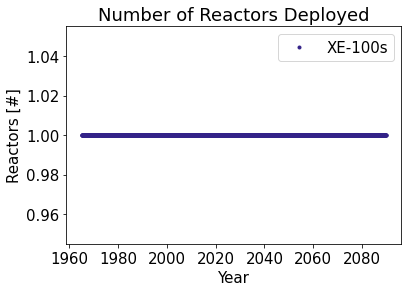

In [60]:
plt.plot(current_reactors['Year'], current_reactors['FuelCycle_total'],'.', label='XE-100s', color=mycolors[0])
plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Reactors [#]')
plt.legend()

## Energy Output

In [61]:
current_energy = tm.get_annual_electricity(current_outfile)

In [62]:
current_energy

,Year,Energy
0,1965,0.013333
1,1966,0.066667
2,1967,0.073333
3,1968,0.066667
4,1969,0.066667
...,...,...
56,2021,0.066667
57,2022,0.066667
58,2023,0.073333
59,2024,0.066667


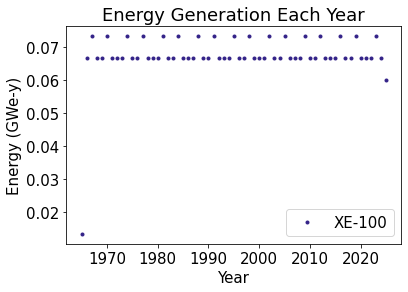

In [63]:
# Plot the yearly energy

plt.plot(current_energy['Year'], current_energy['Energy'],'.', label='XE-100', color=mycolors[0])

plt.title('Energy Generation Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()

## Material Transactions

In [64]:
current_transactions = tm.add_receiver_prototype(current_outfile)

In [65]:
current_triso_xe = dta.commodity_mass_traded(current_transactions, 'fresh_uox')

Maximum mass: 1.7508679999999999
Total mass: 0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
1495    27.263516
1496    27.263516
1497    27.263516
1498    27.263516
1499    27.263516
Name: Quantity, Length: 1500, dtype: float64


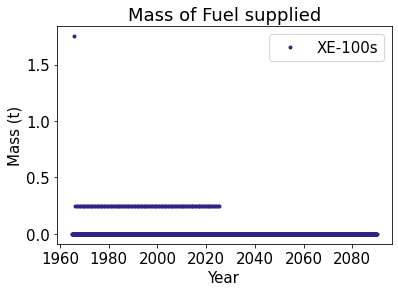

In [66]:
# Comparing fresh_uox transactions to all reactors

plt.plot(current_triso_xe['Year'], current_triso_xe['Quantity']/1000,'.',
         label='XE-100s', color=mycolors[0])
plt.legend() #(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Mass of Fuel supplied')

print('Maximum mass:',max(current_triso_xe['Quantity']/1000))
print('Total mass:',current_triso_xe['Quantity'].cumsum()/1000)

Text(0.5, 1.0, 'Cumulative Mass of TRISO supplied')

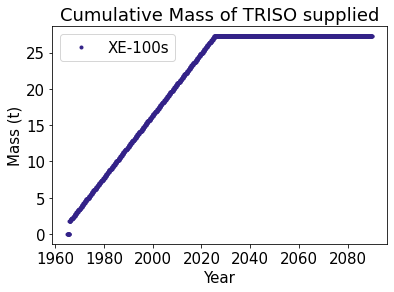

In [53]:
plt.plot(current_triso_xe['Year'], current_triso_xe['Quantity'].cumsum()/1000,'.',
         label='XE-100s', color=mycolors[0])
plt.legend()
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Cumulative Mass of TRISO supplied')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [31]:
# Defining assays for LEU product, tails, and feed material
# Made up values
leu_p = 0.155
x_f = 0.00711
x_t = 0.002

In [32]:
current_tails = dta.calculate_tails(current_triso_xe['Quantity'], leu_p, x_t, x_f)
current_feed = dta.calculate_feed(current_triso_xe['Quantity'], current_tails)
current_swu = dta.calculate_SWU(current_triso_xe['Quantity'], leu_p,
                               current_tails, x_t,
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu = dta.add_year(current_swu)

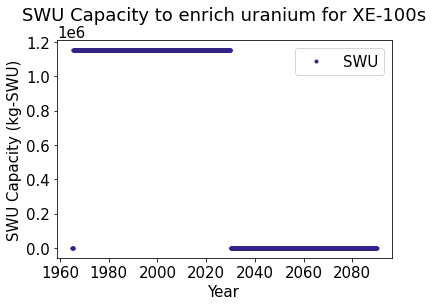

In [33]:
plt.plot(current_swu['Year'], current_swu['SWU'], '.', label='SWU', color=mycolors[0])

plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
title = plt.title('SWU Capacity to enrich uranium for XE-100s', pad=20)
plt.legend()

## Waste Calcs

In [34]:
spent_triso = dta.commodity_mass_traded(current_transactions, 'spent_triso_xe')

In [35]:
current_transactions['Commodity'][9]

'fresh_triso_xe'

In [42]:
lists = []
for item in range(len(current_transactions['Commodity'])):
    it = current_transactions['Commodity'][item]
    if it in list:
        pass
    else:
        lists.append(it)
print(lists)

TypeError: argument of type 'type' is not iterable

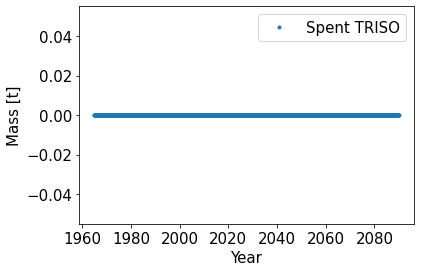

In [43]:
plt.plot(spent_triso['Year'], spent_triso['Quantity']/1000,'.', label='Spent TRISO')

plt.ylabel('Mass [t]')
plt.xlabel('Year')
plt.legend()

In [38]:
w = spent_triso.to_dict()

# create the empty waste dictionary
waste = {'Year':np.zeros(len(w['Year'])),
        'Quantity':np.zeros(len(w['Year']))}

# populate the waste dictionary with the spent_uox values
for year in range(len(w['Year'])):
    waste['Year'][year] = w['Year'][year]
    waste['Quantity'][year] = w['Quantity'][year]/1000 # mass in tons

# convevert the waste dictionary into masses in the format that Cask_Calcs requires
masses = {year: quantity for year, quantity in zip(waste['Year'], waste['Quantity'])}

In [39]:
# numbers are made up

elements = 'prism'
cask_vol = 12.0
den_kernel = 2
vol_kernel = 0.1
mass_kernel = 0.2
vol_triso = 1
mass_triso = 0.4
den_triso = 1.2
vol_prism = 12.0
mass_prism = 0.11

casks_test = waste_calcs.Cask_Calcs(elements,  masses, cask_vol,
                 vol_prism, mass_prism)

In [40]:
num_casks = casks_test.calculate_casks()

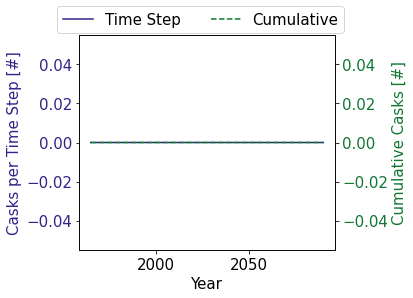

With a leftover of: 0.0


In [41]:
fig, ax1 = plt.subplots()

color = mycolors[0]
ax1.set_xlabel('Year')
ax1.set_ylabel('Casks per Time Step [#]', color=color)
ax1.plot(waste['Year'], num_casks[0], color=color, label='Time Step')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = mycolors[1]
ax2.set_ylabel('Cumulative Casks [#]', color=color)
ax2.plot(waste['Year'], num_casks[0].cumsum(), color=color, label='Cumulative', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.485, 1.07), ncol=2)
plt.show()
print('With a leftover of:', num_casks[1][-1])